# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import driver

/opt/miniconda3/envs/dev/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'ctest.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-18', 'end_time': '2019-08-20'},
 'model': {'cmaqv1': {'files': '/Volumes/Garratt/owlets/aqm.t12z.aconc-sfc.ncf',
   'mod_type': 'cmaq',
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}},
   'projection': 'None'}},
 'obs': {'airnow': {'use_airnow': True,
   'filename': 'test3.nc',
   'obs_type': 'pt_sfc',
   'radius_of_influence': '1e5',
   'plots': {'plots_basename': 'aeronet_cmaq_%Y%m%d_',
    'taylor_diagram': True,
    'bias_plots': False,
    'timeseries': True,
    'giorgi_regional': False,
    'epa_regions': True},
   'stats': {'rmse': True, 'mse': True, 'ioa': True}}}}

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

/Volumes/Garratt/owlets/aqm.t12z.aconc-sfc.ncf
<xarray.Dataset>
Dimensions:    (COL: 442, DATE-TIME: 2, LAY: 1, ROW: 265, TSTEP: 48, VAR: 20)
Dimensions without coordinates: COL, DATE-TIME, LAY, ROW, TSTEP, VAR
Data variables: (12/25)
    TFLAG      (TSTEP, VAR, DATE-TIME) int32 ...
    O3         (TSTEP, LAY, ROW, COL) float32 ...
    CO         (TSTEP, LAY, ROW, COL) float32 ...
    NO         (TSTEP, LAY, ROW, COL) float32 ...
    NO2        (TSTEP, LAY, ROW, COL) float32 1.094e-05 9.334e-06 ... 0.0002983
    NOX        (TSTEP, LAY, ROW, COL) float32 1.172e-05 9.868e-06 ... 0.000315
    ...         ...
    PM25_SO4   (TSTEP, LAY, ROW, COL) float32 ...
    PMC_TOT    (TSTEP, LAY, ROW, COL) float32 ...
    PM25       (TSTEP, LAY, ROW, COL) float32 ...
    PM10       (TSTEP, LAY, ROW, COL) float32 ...
    NOy        (TSTEP, LAY, ROW, COL) float32 1.199e-05 1.038e-05 ... 0.0003151
    NOx        (TSTEP, LAY, ROW, COL) float32 1.277e-05 1.092e-05 ... 0.0003318
Attributes: (12/35)
    IOA

In [5]:
an.models

{'cmaqv1': <driver.model at 0x7fb1e7722730>}

In [7]:
an.models['cmaqv1']

In [8]:
an.models['cmaqv1'].obj.time

<xarray.DataArray 'time' (time: 48)>
array(['2019-08-18T13:00:00.000000000', '2019-08-18T14:00:00.000000000',
       '2019-08-18T15:00:00.000000000', '2019-08-18T16:00:00.000000000',
       '2019-08-18T17:00:00.000000000', '2019-08-18T18:00:00.000000000',
       '2019-08-18T19:00:00.000000000', '2019-08-18T20:00:00.000000000',
       '2019-08-18T21:00:00.000000000', '2019-08-18T22:00:00.000000000',
       '2019-08-18T23:00:00.000000000', '2019-08-19T00:00:00.000000000',
       '2019-08-19T01:00:00.000000000', '2019-08-19T02:00:00.000000000',
       '2019-08-19T03:00:00.000000000', '2019-08-19T04:00:00.000000000',
       '2019-08-19T05:00:00.000000000', '2019-08-19T06:00:00.000000000',
       '2019-08-19T07:00:00.000000000', '2019-08-19T08:00:00.000000000',
       '2019-08-19T09:00:00.000000000', '2019-08-19T10:00:00.000000000',
       '2019-08-19T11:00:00.000000000', '2019-08-19T12:00:00.000000000',
       '2019-08-19T13:00:00.000000000', '2019-08-19T14:00:00.000000000',
       '2019-08-19T15:00:00.000000000', '2019-08-19T16:00:00.000000000',
       '2019-08-19T17:00:00.000000000', '2019-08-19T18:00:00.000000000',
       '2019-08-19T19:00:00.000000000', '2019-08-19T20:00:00.000000000',
       '2019-08-19T21:00:00.000000000', '2019-08-19T22:00:00.000000000',
       '2019-08-19T23:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-20T01:00:00.000000000', '2019-08-20T02:00:00.000000000',
       '2019-08-20T03:00:00.000000000', '2019-08-20T04:00:00.000000000',
       '2019-08-20T05:00:00.000000000', '2019-08-20T06:00:00.000000000',
       '2019-08-20T07:00:00.000000000', '2019-08-20T08:00:00.000000000',
       '2019-08-20T09:00:00.000000000', '2019-08-20T10:00:00.000000000',
       '2019-08-20T11:00:00.000000000', '2019-08-20T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-08-18T13:00:00 ... 2019-08-20T12:00:00

In [9]:
an.start_time

Timestamp('2019-08-18 00:00:00')

### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [10]:
an.open_obs()

In [11]:
an.obs['airnow'].obj.transpose('time','y','x')

<xarray.Dataset>
Dimensions:     (time: 219, x: 3755, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3748 3749 3750 3751 3752 3753 3754
  * time        (time) datetime64[ns] 2019-08-18 ... 2019-08-21T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/29)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 ...
    NO          (time, y, x) float64 ...
    NO2         (time, y, x) float64 ...
    NO2Y        (time, y, x) float64 ...
    ...          ...
    units       (y, x) object ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-03-10

In [12]:
an.pair_data()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s


In [13]:
an.paired

{'airnow_cmaqv1': <driver.pair at 0x7fb1acef4970>}

In [21]:
df = an.paired['airnow_cmaqv1'].obj.to_dataframe().reset_index(drop=True).dropna(subset=['O3'])


<AxesSubplot:xlabel='O3'>

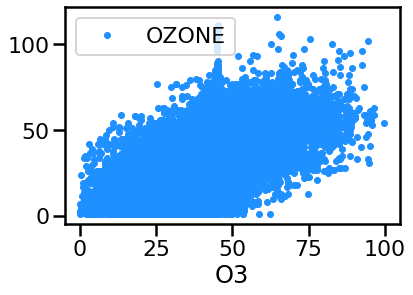

In [23]:
df.loc[df.OZONE > 1].plot(x='O3',y='OZONE',marker='.',linewidth=0)